<a href="https://colab.research.google.com/github/tawfeeq6719/superstore-analysis/blob/main/SUPERSTORECASESTUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY MODULES FOR DATA VISUALIZATION

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

LOADING THE DATASETS

In [10]:
df=pd.read_csv("/content/Analysis of Super Store - DA.csv")

In [11]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


DATA CLEANING AND EXPLORATION PROCESS:

In [12]:
df.drop(columns="Postal Code", inplace = True)

In [13]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [17]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [19]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

CREATING LOSS DATAFRAME :

In [20]:
loss_df=df[df['Profit'] < 0]

In [21]:
loss_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [22]:
loss_df.describe()

,Sales,Quantity,Discount,Profit
count,1871.000000,1871.000000,1871.000000,1871.000000
mean,250.511574,3.762694,0.480887,-83.448042
std,715.067296,2.141347,0.235080,284.423422
min,0.444000,1.000000,0.100000,-6599.978000
25%,12.503000,2.000000,0.200000,-58.660950
50%,71.088000,3.000000,0.400000,-18.088200
75%,284.922000,5.000000,0.700000,-6.261500
max,22638.480000,14.000000,0.800000,-0.089500


In [24]:
Total_loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 156131.29


In [27]:
loss_df.groupby(by='Segment').sum(numeric_only=True)

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,247196.2460,3651,476.76,-84945.7112
Corporate,131860.5383,2191,272.00,-44787.2076
Home Office,89650.3705,1198,150.98,-26398.3669


In [30]:
loss_df.groupby(by='Sub-Category').sum(numeric_only=True)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,10958.8000,330,18.20,-930.6265
Appliances,3382.5340,235,53.60,-8629.6412
Binders,36140.6130,2456,452.40,-38510.4964
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91988.4560,876,61.40,-9880.8413
Fasteners,149.2800,55,2.40,-33.1952
Furnishings,12845.8440,597,88.60,-6490.9134
Machines,72456.2530,157,25.60,-30118.6682
Phones,35797.8400,476,46.60,-7530.6235


In [31]:
loss_df['Sub-Category'].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [33]:
loss_df.groupby(by='City').sum(numeric_only=True).sort_values('Profit', ascending=True).head(10)

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411
Houston,37640.7304,683,104.14,-14785.3668
Chicago,19910.0120,541,88.20,-11120.6271
San Antonio,17395.1450,139,17.10,-7831.0254
Lancaster,7699.2420,71,9.40,-7632.4946
Burlington,12044.8740,19,2.00,-5999.3318
Dallas,9994.0562,280,39.30,-4208.5218
Jacksonville,31146.2710,154,18.85,-4059.9857
New York City,19533.8020,132,12.20,-3966.0226


In [36]:
loss_df.groupby(by='Category').mean(numeric_only=True).sort_values('Sales', ascending=True)

,Sales,Quantity,Discount,Profit
Category,,,,
Office Supplies,103.395796,3.865688,0.617607,-63.899840
Furniture,361.184295,3.714286,0.367143,-85.344690
Technology,439.899974,3.553506,0.333579,-142.361322


In [39]:
df.groupby(['State'])['Sales'].sum(numeric_only=True).nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [42]:
df.groupby('Segment').sum(numeric_only=True)

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


In [44]:
df.groupby(by='Region').sum(numeric_only=True)

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


DATA VISUALIZATION :

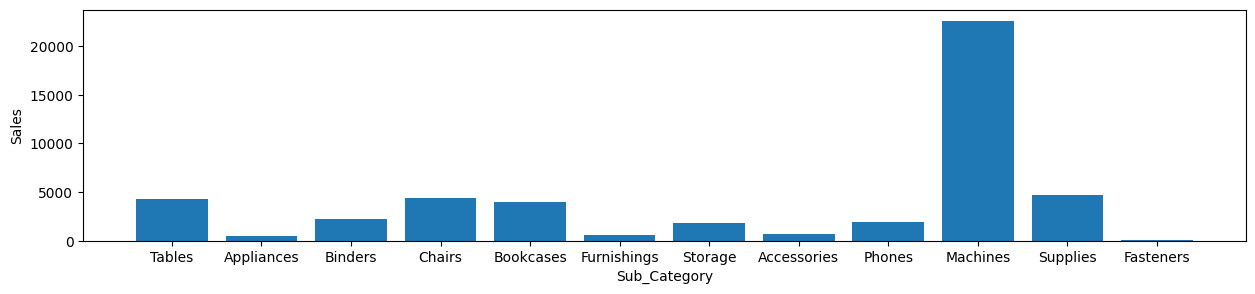

In [45]:
plt.rcParams['figure.figsize']=(15,3)
plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

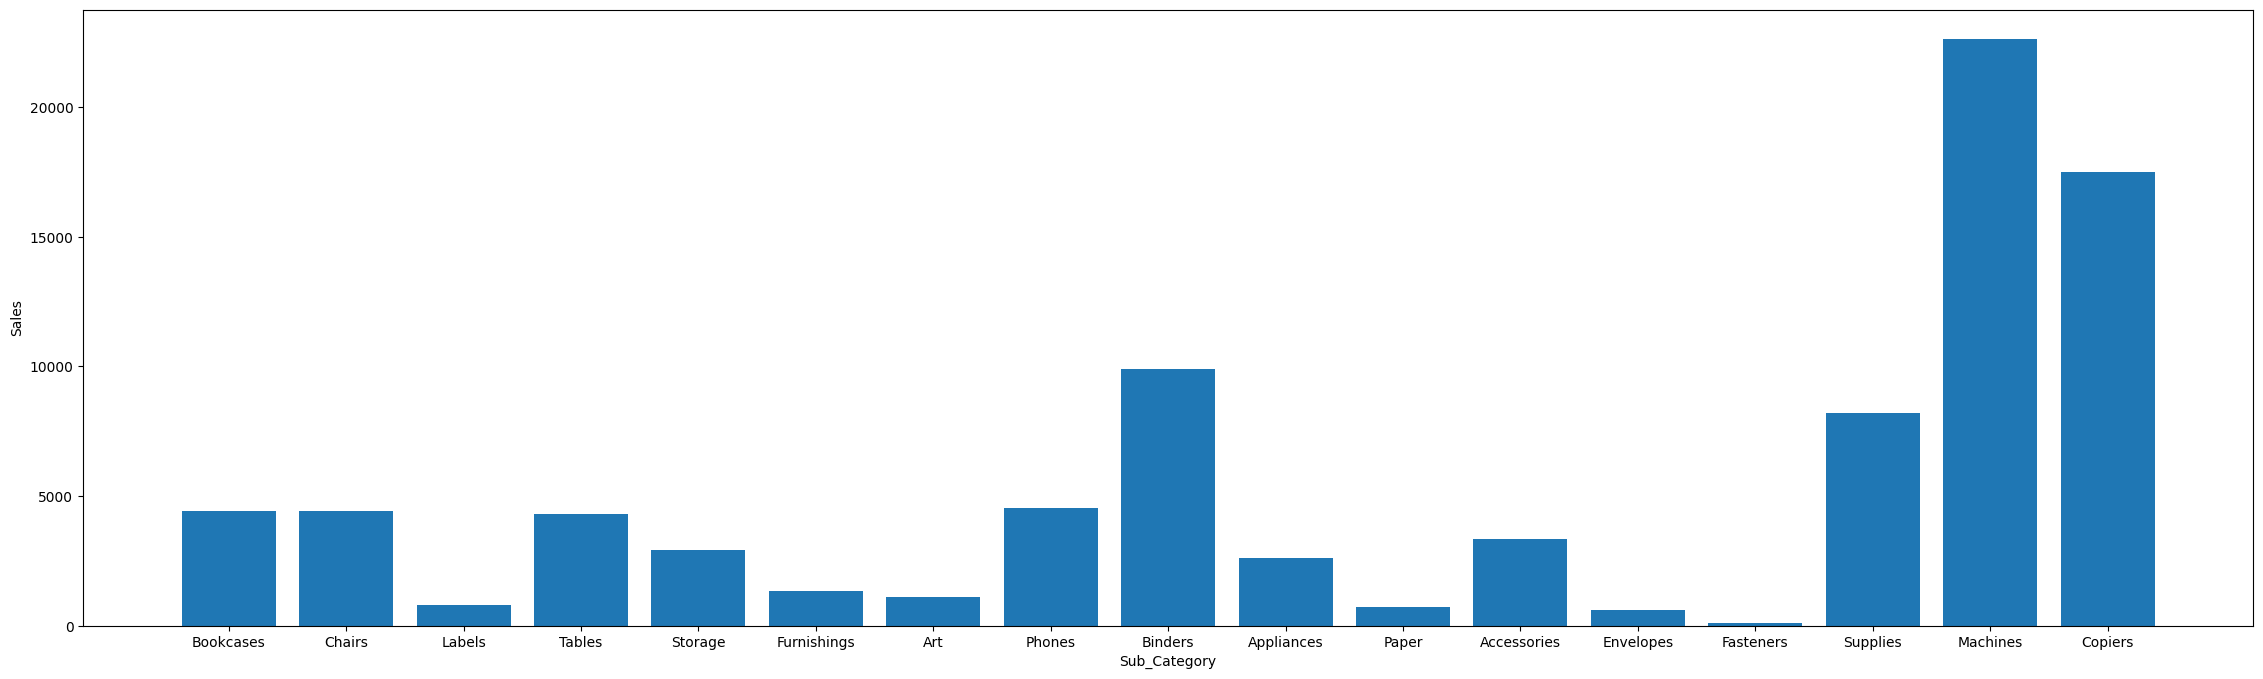

In [46]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

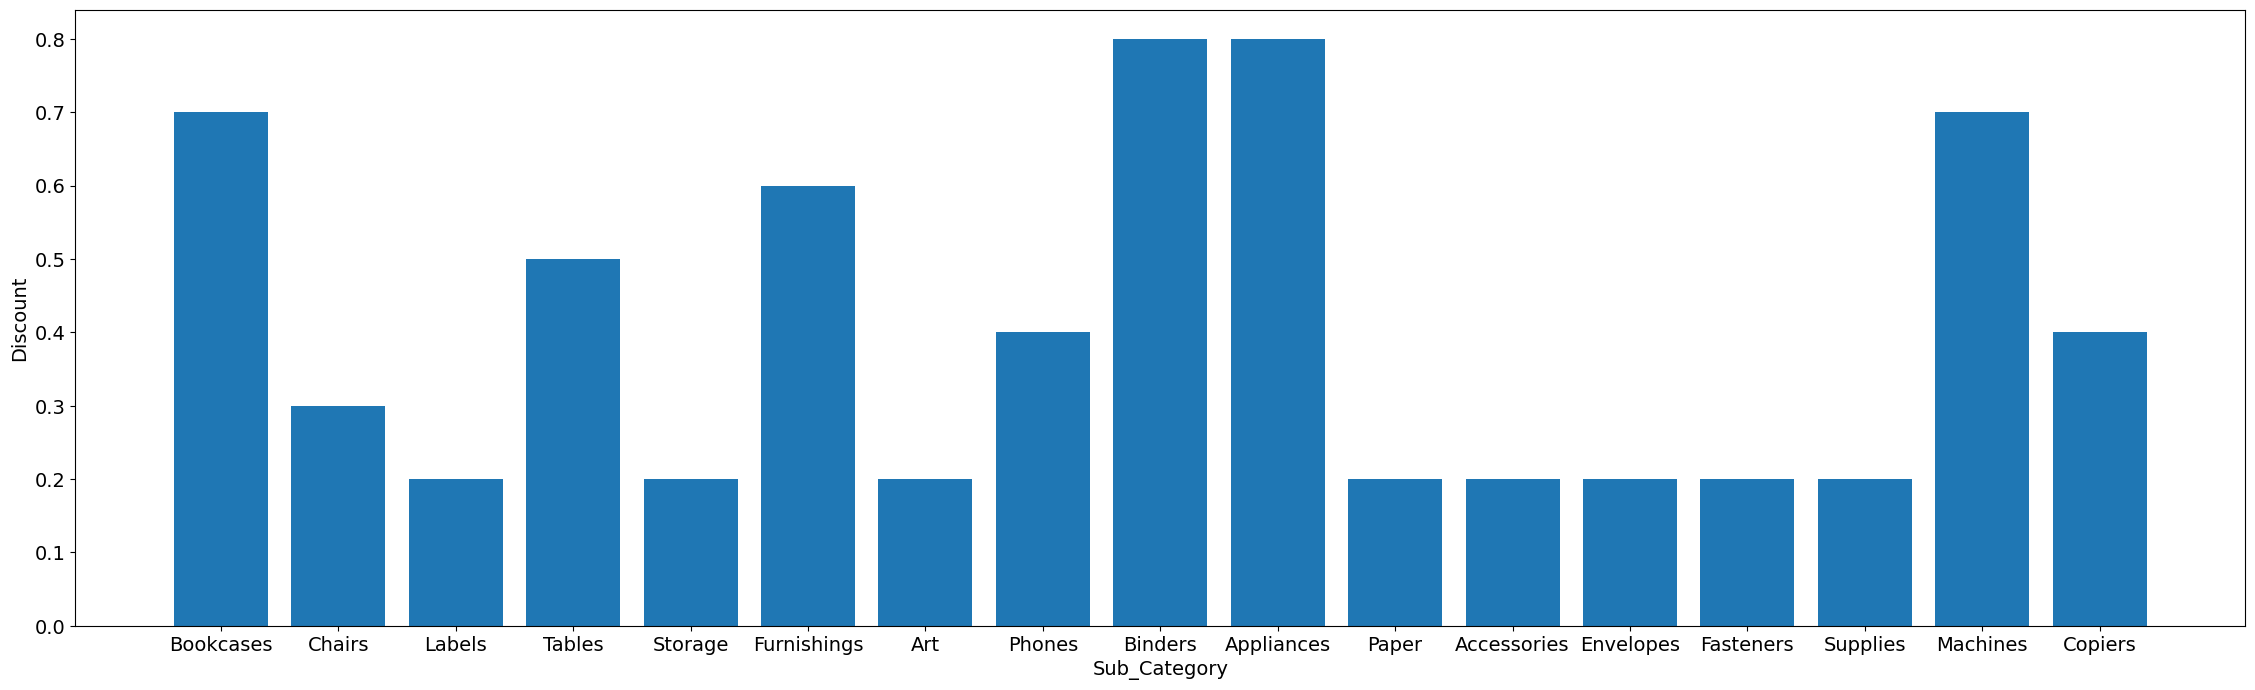

In [47]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Discount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Discount');

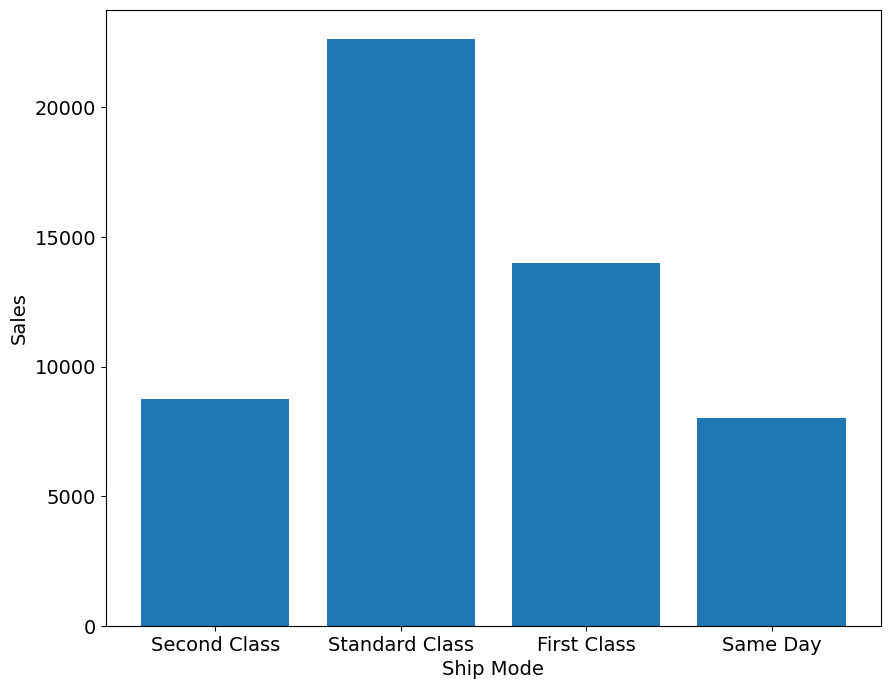

In [48]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['Ship Mode'],df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

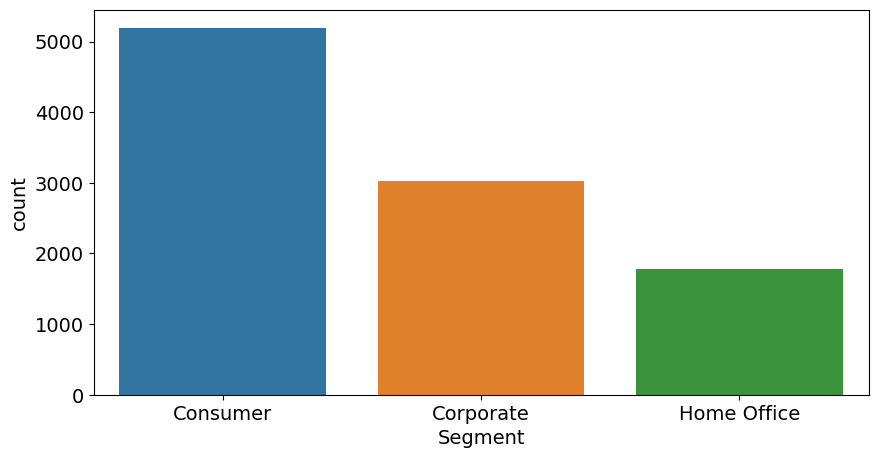

In [52]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=df.Segment)
plt.show();

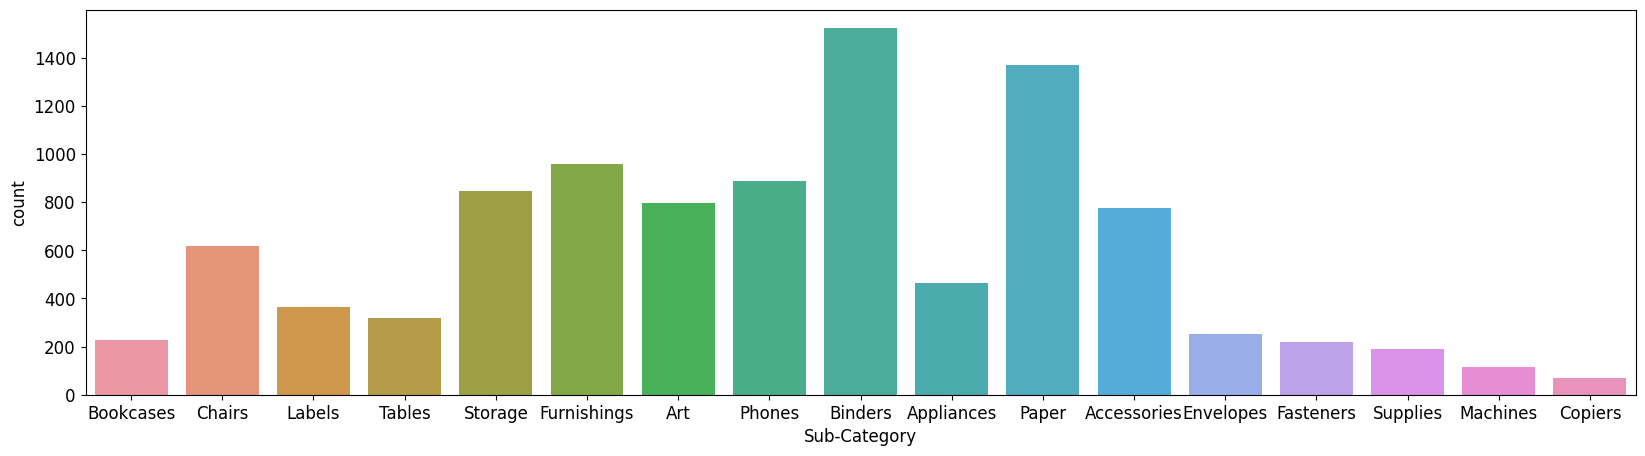

In [53]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=df)
plt.show()

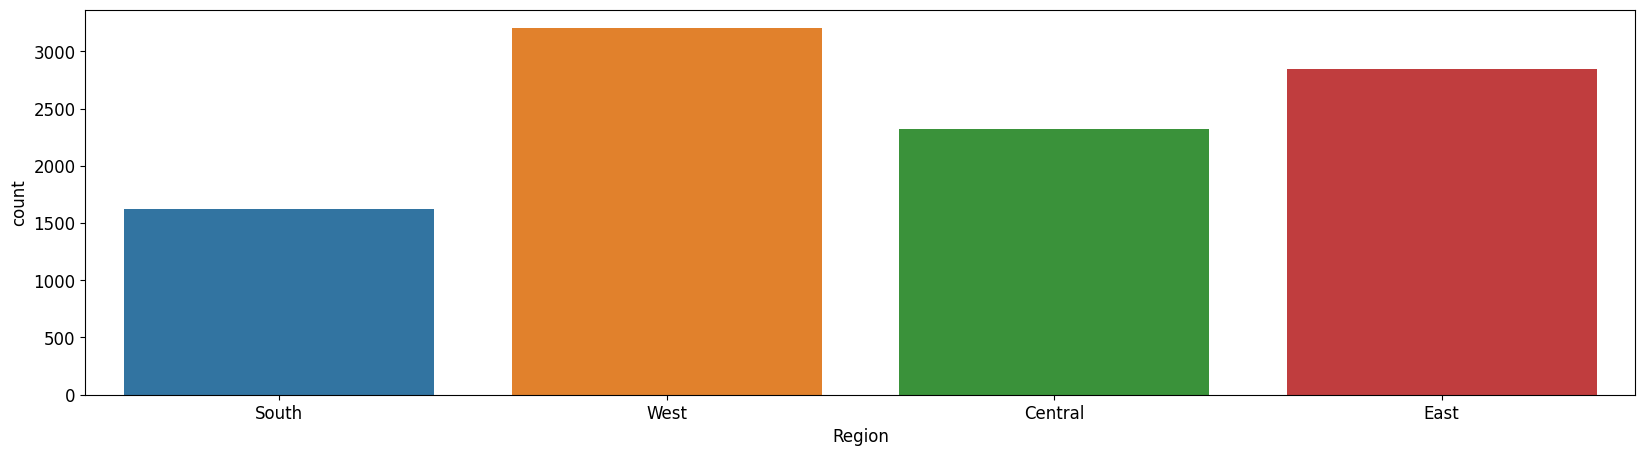

In [54]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=df)
plt.show()

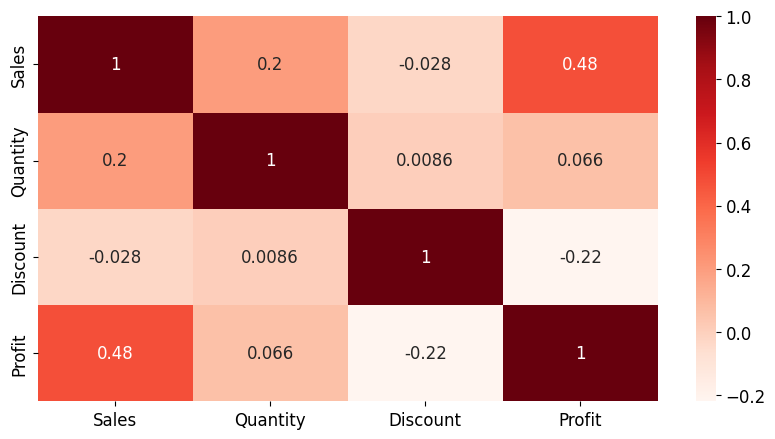

In [57]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)